Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier


Using TensorFlow backend.


Importing Dataset

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Resolving Categorical Features

In [5]:
Gender = pd.get_dummies(df['Gender'], drop_first = True)
Geography = pd.get_dummies(df['Geography'],drop_first = True)
df = pd.concat([df, Geography, Gender],axis = 1)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,0


Checking for Null Values in dataframe df

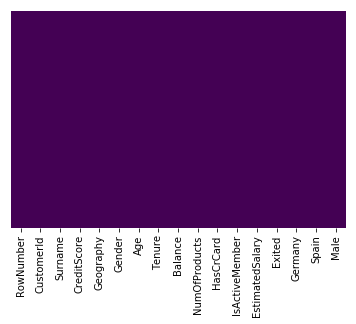

In [6]:
sns.heatmap(df.isnull(), cmap = 'viridis', yticklabels = False, cbar = False)

Exploring the dataset

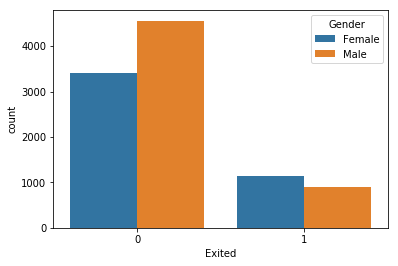

In [7]:
sns.countplot(x = 'Exited', hue = 'Gender', data = df)

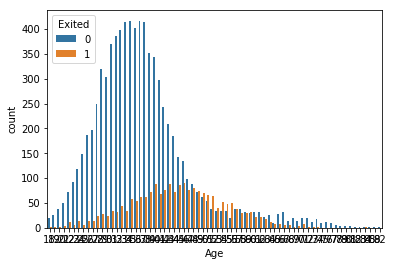

In [8]:
sns.countplot(x = df['Age'], hue = df['Exited'])

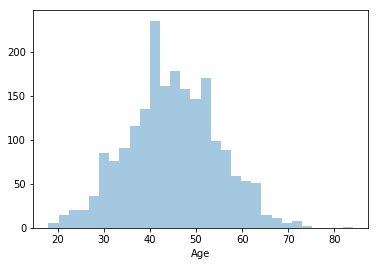

In [9]:
sns.distplot(df[df["Exited"] == 1]['Age'], kde = False, bins = 30)

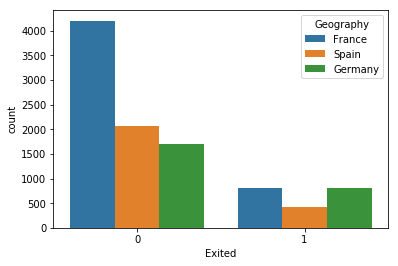

In [10]:
sns.countplot(x = 'Exited', data = df, hue = 'Geography')

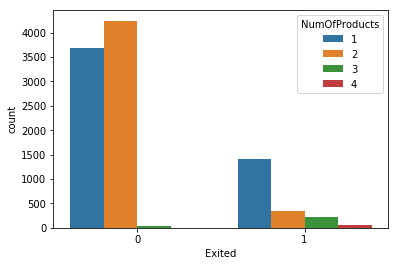

In [11]:
sns.countplot(x = 'Exited', data = df, hue = 'NumOfProducts')

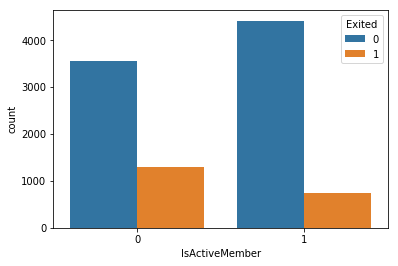

In [12]:
sns.countplot(df['IsActiveMember'], hue = df['Exited'])

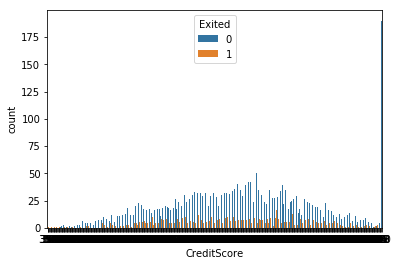

In [13]:
sns.countplot(df['CreditScore'], hue = df['Exited'])

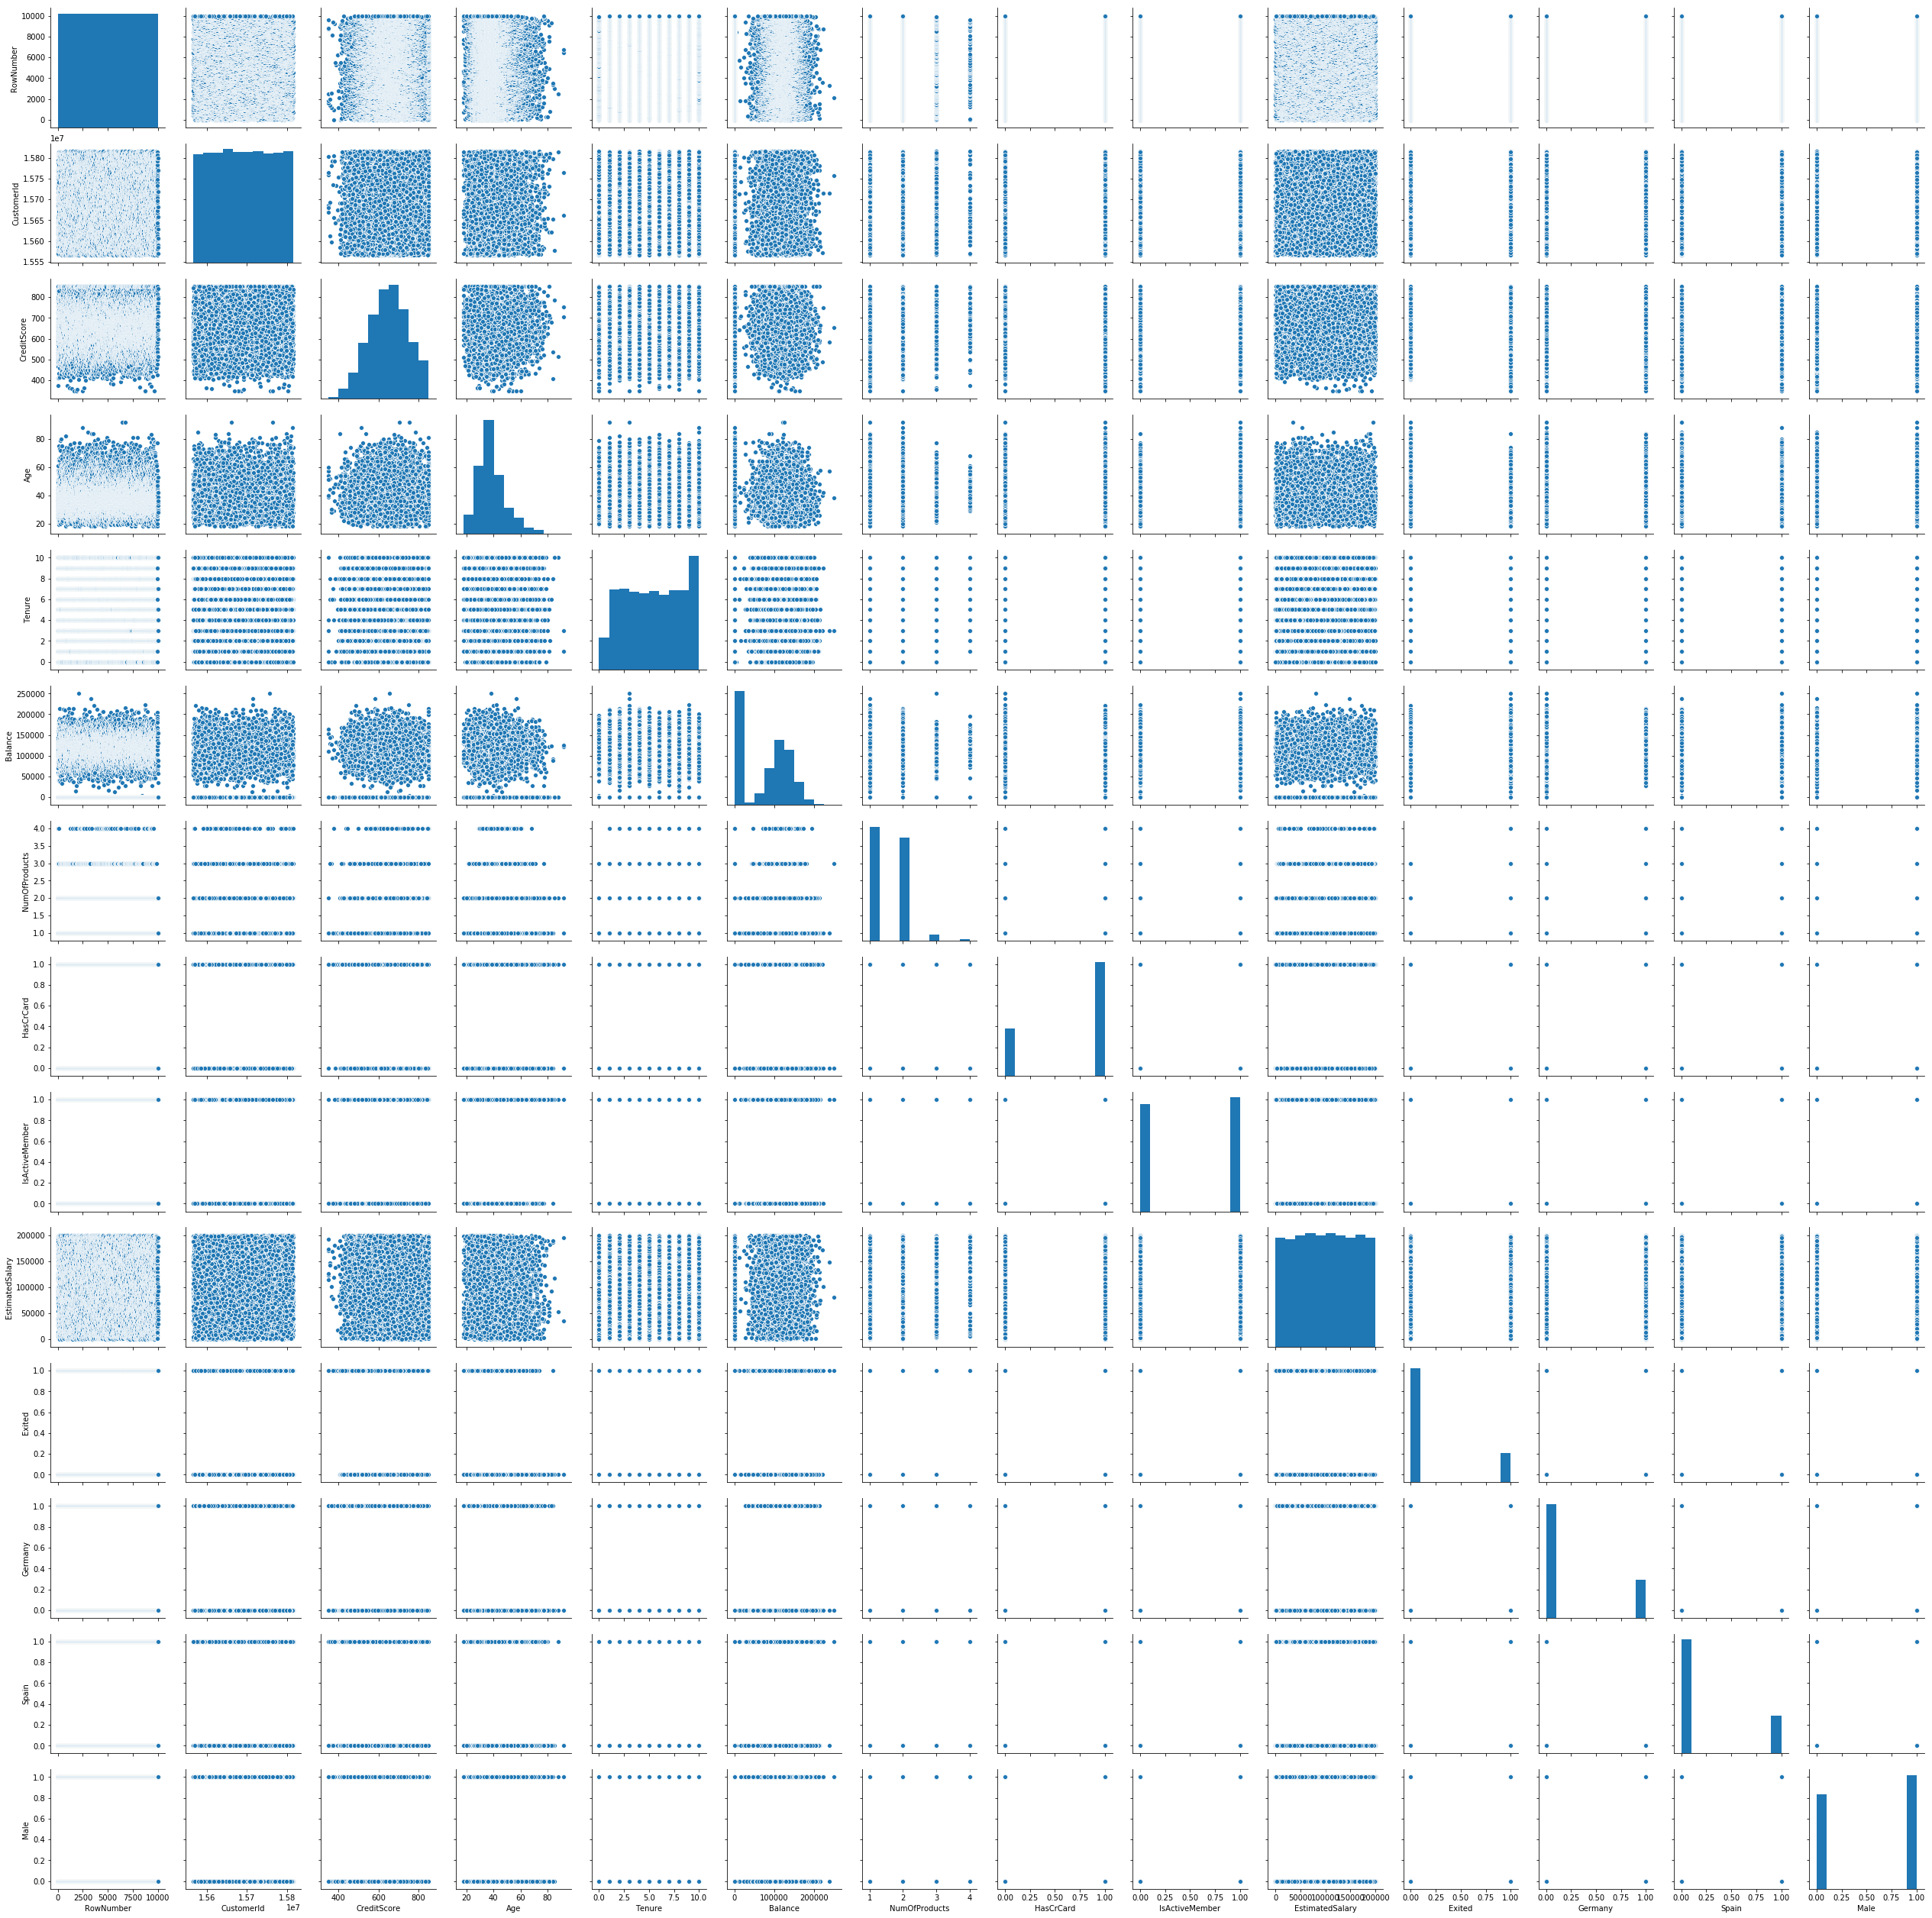

In [14]:
sns.pairplot(df)

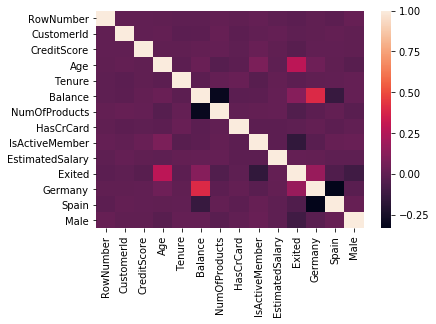

In [15]:
sns.heatmap(df.corr())

From above heatmap it's very clear to findout which are important feature for predicton..
Droping unnecessary columns

In [16]:
X = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited', 'Gender', 'Geography', 'HasCrCard'], axis = 1)
Y = df['Exited']

In [17]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,1,112542.58,0,1,0
2,502,42,8,159660.80,3,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,79084.10,0,1,0


Splitting train and test set

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(7000, 10) (3000, 10) (7000,) (3000,)


Decision Tree Classification

In [19]:
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [20]:
train_pred = classifier_dt.predict(X_train)
test_pred = classifier_dt.predict(X_test)

In [21]:
print("Traning set accuracy : " , accuracy_score(Y_train, train_pred)*100)
print("Test set accuracy    : " , accuracy_score(Y_test, test_pred)*100)

Traning set accuracy :  100.0
Test set accuracy    :  79.60000000000001


It is clearly seen that there is too much variance in training i.e., Overfitting

Scaling the training and tets set

In [22]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


Creating the Neural Network Using Keras

In [23]:
classifier_k = Sequential()
classifier_k.add(Dense(units = 20, input_dim = 10, activation = 'relu'))
classifier_k.add(Dropout(rate = 0.2))
classifier_k.add(Dense(units = 30, activation = 'relu'))
classifier_k.add(Dropout(rate = 0.3))
classifier_k.add(Dense(units = 40, activation= 'relu'))
classifier_k.add(Dropout(rate = 0.3))
classifier_k.add(Dense(units = 30, activation = 'relu'))
classifier_k.add(Dropout(rate = 0.2))
classifier_k.add(Dense(units = 20, activation = 'relu'))
classifier_k.add(Dropout(rate = 0.2))
classifier_k.add(Dense(units = 10, activation = 'relu'))
classifier_k.add(Dense(units = 1, activation = 'sigmoid'))

We are adding Dropout in the model to avoid "Overfitting"

In [24]:
classifier_k.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                630       
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 40)                1240      
_________________________________________________________________
dropout_3 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 30)                1230      
__________

In [25]:
classifier_k.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Trainging the Model...This will take some time

In [26]:
classifier_k.fit(X_train, Y_train, epochs = 200, batch_size = 32)

Epoch 1/200
7000/7000 [==============================] - 1s 179us/step - loss: 0.5266 - acc: 0.7766
Epoch 2/200
7000/7000 [==============================] - 0s 68us/step - loss: 0.4765 - acc: 0.7924
Epoch 3/200
7000/7000 [==============================] - 0s 66us/step - loss: 0.4653 - acc: 0.7924
Epoch 4/200
7000/7000 [==============================] - 0s 69us/step - loss: 0.4599 - acc: 0.7924
Epoch 5/200
7000/7000 [==============================] - 0s 71us/step - loss: 0.4473 - acc: 0.7949
Epoch 6/200
7000/7000 [==============================] - 0s 62us/step - loss: 0.4404 - acc: 0.8046
Epoch 7/200
7000/7000 [==============================] - 0s 67us/step - loss: 0.4248 - acc: 0.8187
Epoch 8/200
7000/7000 [==============================] - 0s 68us/step - loss: 0.4200 - acc: 0.8201
Epoch 9/200
7000/7000 [==============================] - 0s 68us/step - loss: 0.4104 - acc: 0.8239
Epoch 10/200
7000/7000 [==============================] - 0s 66us/step - loss: 0.3967 - acc: 0.8336
Epoch 11

7000/7000 [==============================] - 1s 82us/step - loss: 0.3421 - acc: 0.8590
Epoch 83/200
7000/7000 [==============================] - 1s 94us/step - loss: 0.3538 - acc: 0.8537: 1s - loss: 0.3694 - 
Epoch 84/200
7000/7000 [==============================] - 1s 80us/step - loss: 0.3436 - acc: 0.8631
Epoch 85/200
7000/7000 [==============================] - 1s 101us/step - loss: 0.3428 - acc: 0.8597
Epoch 86/200
7000/7000 [==============================] - 1s 81us/step - loss: 0.3436 - acc: 0.8627
Epoch 87/200
7000/7000 [==============================] - 1s 77us/step - loss: 0.3457 - acc: 0.8570
Epoch 88/200
7000/7000 [==============================] - 1s 110us/step - loss: 0.3518 - acc: 0.8567
Epoch 89/200
7000/7000 [==============================] - 1s 97us/step - loss: 0.3448 - acc: 0.8574
Epoch 90/200
7000/7000 [==============================] - 1s 100us/step - loss: 0.3440 - acc: 0.8599
Epoch 91/200
7000/7000 [==============================] - 1s 88us/step - loss: 0.3431 - 

7000/7000 [==============================] - 1s 101us/step - loss: 0.3380 - acc: 0.8601
Epoch 162/200
7000/7000 [==============================] - 1s 101us/step - loss: 0.3398 - acc: 0.8600
Epoch 163/200
7000/7000 [==============================] - 1s 103us/step - loss: 0.3383 - acc: 0.8606
Epoch 164/200
7000/7000 [==============================] - 1s 93us/step - loss: 0.3377 - acc: 0.8644
Epoch 165/200
7000/7000 [==============================] - 1s 96us/step - loss: 0.3380 - acc: 0.8601
Epoch 166/200
7000/7000 [==============================] - 1s 83us/step - loss: 0.3371 - acc: 0.8603
Epoch 167/200
7000/7000 [==============================] - 1s 102us/step - loss: 0.3392 - acc: 0.8603
Epoch 168/200
7000/7000 [==============================] - 1s 96us/step - loss: 0.3351 - acc: 0.8619: 0s - loss: 0.3556 -
Epoch 169/200
7000/7000 [==============================] - ETA: 0s - loss: 0.3374 - acc: 0.861 - 1s 97us/step - loss: 0.3377 - acc: 0.8614
Epoch 170/200
7000/7000 [=================

Predicting values from trained model for training and test set

In [27]:
train_pred = classifier_k.predict(X_train)
test_pred = classifier_k.predict(X_test)

In [28]:
Y_train_pred = (train_pred > 0.5)*1

In [29]:
Y_test_pred = (test_pred > 0.5) * 1

Calculating Accuracy after training with Neural Network

In [30]:
print("Train Set Accuracy : ", accuracy_score(Y_train_pred, Y_train))
print("Test Set Accuracy  : ", accuracy_score(Y_test_pred, Y_test))

Train Set Accuracy :  0.8721428571428571
Test Set Accuracy  :  0.8623333333333333
